In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os

# Load cleaned data
data_path = "../data/processed/Tesla_Cleaned.csv"
df = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date")
df = df.asfreq('B')  # business day frequency
df['Close'] = df['Close'].interpolate()



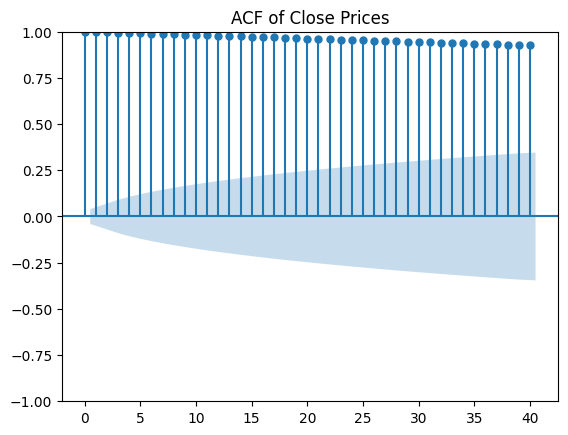

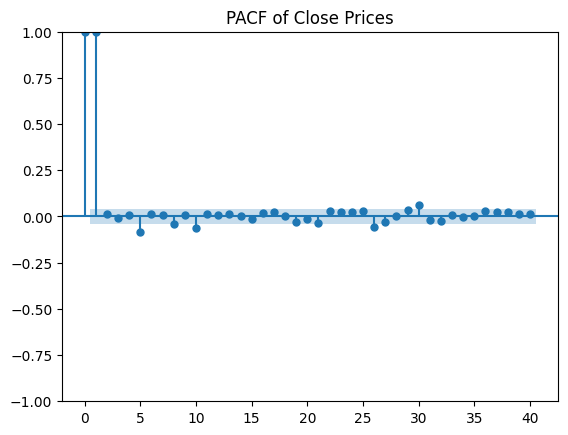

In [5]:
plot_acf(df["Close"].dropna(), lags=40)
plt.title("ACF of Close Prices")
plt.show()

plot_pacf(df["Close"].dropna(), lags=40)
plt.title("PACF of Close Prices")
plt.show()


C:\Users\sospeter\PycharmProjects\pythonProject\tesla-stock-forecasting\.venv311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sospeter\PycharmProjects\pythonProject\tesla-stock-forecasting\.venv311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2358
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7378.920
Date:                Tue, 13 May 2025   AIC                          14763.839
Time:                        21:45:55   BIC                          14781.135
Sample:                    01-02-2015   HQIC                         14770.137
                         - 01-16-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7061      0.149     -4.726      0.000      -0.999      -0.413
ma.L1          0.6789      0.155      4.369      0.000       0.374       0.983
sigma2        30.6735      0.330     92.939      0.0

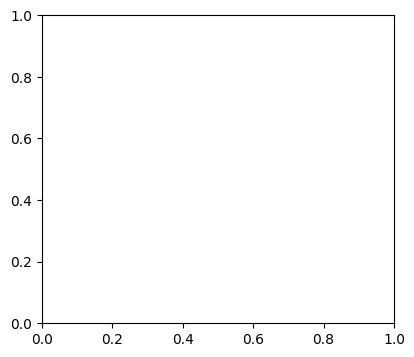

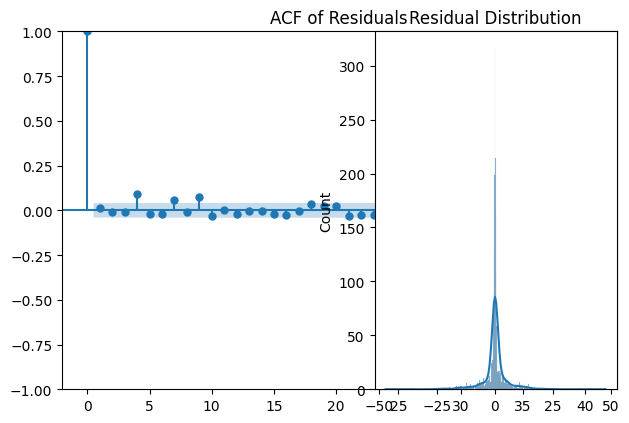

Ljung-Box Test:
       lb_stat  lb_pvalue
10  46.134845   0.000001


In [6]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import os

# 2. Load and preprocess data
data_path = "../data/processed/Tesla_Cleaned.csv"  # Adjust path if needed
df = pd.read_csv(data_path, parse_dates=["Date"], index_col="Date")
df = df.asfreq('B')
df["Close"] = df["Close"].interpolate()

# 3. Fit ARIMA model
model = ARIMA(df["Close"], order=(1, 1, 1))
results = model.fit()
print(results.summary())

# 4. Residual diagnostics
residuals = results.resid

# Create output directory if it doesn't exist
os.makedirs("results/figures", exist_ok=True)

# Plot residual ACF and histogram
plt.figure(figsize=(10, 4))

plt.subplot(121)
plot_acf(residuals.dropna(), lags=40)
plt.title("ACF of Residuals")

plt.subplot(122)
sns.histplot(residuals.dropna(), kde=True)
plt.title("Residual Distribution")

plt.tight_layout()
plt.savefig("results/figures/arima_residual_diagnostics.png")
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
print("Ljung-Box Test:\n", lb_test)



RMSE: 5.5454, MAE: 2.7561, MAPE: 2.42%


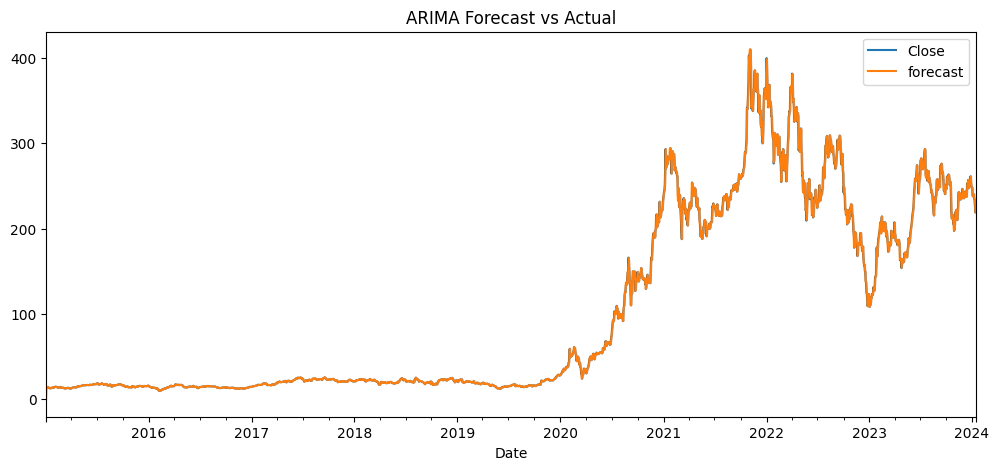

In [8]:
df["forecast"] = results.predict(start=0, end=len(df)-1)
rmse = np.sqrt(mean_squared_error(df["Close"], df["forecast"]))
mae = mean_absolute_error(df["Close"], df["forecast"])
mape = np.mean(np.abs((df["Close"] - df["forecast"]) / df["Close"])) * 100

print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")

df[["Close", "forecast"]].plot(figsize=(12,5), title="ARIMA Forecast vs Actual")
plt.show()


In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import os

# Load the cleaned dataset using the absolute path
df = pd.read_csv(
    "C:/Users/sospeter/PycharmProjects/pythonProject/tesla-stock-forecasting/data/processed/Tesla_Cleaned.csv",
    parse_dates=["Date"],
    index_col="Date"
)

# Fit ARIMA(1,1,1)
model = ARIMA(df["Close"], order=(1, 1, 1))
results = model.fit()

# Extract residuals
residuals = results.resid

# Save ACF plot of residuals
fig = plot_acf(residuals)
os.makedirs("results/figures", exist_ok=True)
fig.savefig("results/figures/arima_residual_acf.png")
plt.close()

print("✅ Residual ACF plot saved.")


C:\Users\sospeter\PycharmProjects\pythonProject\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sospeter\PycharmProjects\pythonProject\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sospeter\PycharmProjects\pythonProject\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ Residual ACF plot saved.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import os

# Load the cleaned dataset
df = pd.read_csv(r"C:\Users\sospeter\PycharmProjects\pythonProject\tesla-stock-forecasting\data\processed\Tesla_Cleaned.csv", 
                 parse_dates=["Date"], index_col="Date")



# Fit ARIMA(1,1,1) model
model = ARIMA(df["Close"], order=(1, 1, 1))
results = model.fit()

# Generate in-sample predictions (same length as data)
df["predicted"] = results.predict(start=1, end=len(df)-1, dynamic=False)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Actual", linewidth=2)
plt.plot(df["predicted"], label="Predicted", linewidth=2, linestyle='--')
plt.title("Actual vs Predicted Closing Prices (ARIMA Model)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Ensure the save directory exists
fig_path = "results/figures"
os.makedirs(fig_path, exist_ok=True)
plt.savefig(os.path.join(fig_path, "arima_actual_vs_predicted.png"))
plt.close()

print("✅ Actual vs Predicted plot saved to results/figures/arima_actual_vs_predicted.png")


C:\Users\sospeter\PycharmProjects\pythonProject\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sospeter\PycharmProjects\pythonProject\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\sospeter\PycharmProjects\pythonProject\.venv1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


✅ Actual vs Predicted plot saved to results/figures/arima_actual_vs_predicted.png
